<a href="https://colab.research.google.com/github/nonoumasy/tv-show-ratings/blob/master/TV_Shows_Season_Episode_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
titles_df = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t', )
episode_df = pd.read_csv('https://datasets.imdbws.com/title.episode.tsv.gz', sep='\t', )
ratings_df = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep='\t', )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [118]:
title = 'Seinfeld'
titles_df[titles_df.primaryTitle == title]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
96750,tt0098904,tvSeries,Seinfeld,Seinfeld,0,1989,1998,22,Comedy
905101,tt0933773,tvEpisode,Seinfeld,Seinfeld,0,2006,\N,\N,"Biography,Documentary"
1505990,tt10939038,tvEpisode,Seinfeld,Seinfeld,0,2019,\N,\N,Talk-Show
2484962,tt1536149,tvEpisode,Seinfeld,Seinfeld,0,2009,\N,41,Comedy
3309986,tt2433286,tvEpisode,Seinfeld,Seinfeld,0,2009,\N,\N,Comedy
4728524,tt5677882,tvEpisode,Seinfeld,Seinfeld,0,1999,\N,\N,"Documentary,News"
5458946,tt7282966,tvEpisode,Seinfeld,Seinfeld,0,2017,\N,\N,\N


In [0]:
tbbt_df = titles_df[titles_df.tconst == 'tt0898266']
got_df = titles_df[titles_df.tconst == 'tt0944947']
bb_df = titles_df[titles_df.tconst == 'tt0903747']
seinfeld_df = titles_df[titles_df.tconst == 'tt0098904']


In [0]:
df = pd.merge(episode_df.merge(seinfeld_df, left_on='parentTconst', right_on='tconst'), ratings_df, left_on='tconst_x', right_on='tconst')

<function matplotlib.pyplot.show>

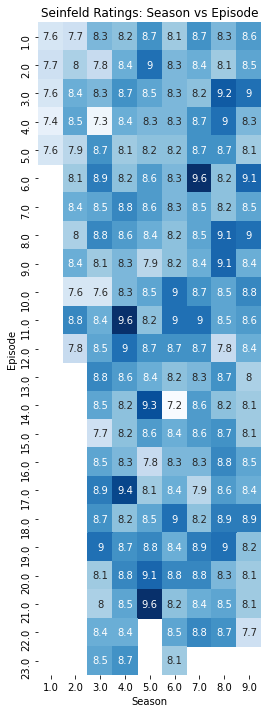

In [136]:
# Plot
plt.figure(figsize=(4,12))
sns.heatmap(pd.crosstab(index=df.episodeNumber.astype('float').sort_values(), 
                        columns=df.seasonNumber.astype('float'), 
                        values=df.averageRating, aggfunc='sum'), 
            annot=True, 
            cmap='Blues',
            cbar=False,
            )
plt.title('Seinfeld Ratings: Season vs Episode')
plt.xlabel('Season')
plt.ylabel('Episode')
plt.show

In [46]:
df.head()

,tconst_x,parentTconst,seasonNumber,episodeNumber,tconst_y,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tconst,averageRating,numVotes
0,tt0775431,tt0898266,1,1,tt0898266,tvSeries,The Big Bang Theory,The Big Bang Theory,0,2007,2019,22,"Comedy,Romance",tt0775431,8.3,4978
1,tt10590194,tt0898266,10,0,tt0898266,tvSeries,The Big Bang Theory,The Big Bang Theory,0,2007,2019,22,"Comedy,Romance",tt10590194,7.8,78
2,tt1091289,tt0898266,1,2,tt0898266,tvSeries,The Big Bang Theory,The Big Bang Theory,0,2007,2019,22,"Comedy,Romance",tt1091289,8.4,3918
3,tt1091290,tt0898266,1,3,tt0898266,tvSeries,The Big Bang Theory,The Big Bang Theory,0,2007,2019,22,"Comedy,Romance",tt1091290,7.8,3446
4,tt1091291,tt0898266,1,4,tt0898266,tvSeries,The Big Bang Theory,The Big Bang Theory,0,2007,2019,22,"Comedy,Romance",tt1091291,8.2,3504


In [63]:
pd.options.display.max_rows = 999
df[df.episodeNumber == 0.0]

,tconst_x,parentTconst,seasonNumber,episodeNumber,tconst_y,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tconst,averageRating,numVotes
1,tt10590194,tt0898266,10.0,0.0,tt0898266,tvSeries,The Big Bang Theory,The Big Bang Theory,0,2007,2019,22,"Comedy,Romance",tt10590194,7.8,78
101,tt2176186,tt0898266,1.0,0.0,tt0898266,tvSeries,The Big Bang Theory,The Big Bang Theory,0,2007,2019,22,"Comedy,Romance",tt2176186,6.7,1711


In [60]:
episode_df[episode_df.tconst == 'tt10590194']

,tconst,parentTconst,seasonNumber,episodeNumber
708917,tt10590194,tt0898266,10,0


In [62]:
titles_df[titles_df.tconst == 'tt0898266']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
870801,tt0898266,tvSeries,The Big Bang Theory,The Big Bang Theory,0,2007,2019,22,"Comedy,Romance"
